# Visualization and Analysis of Covid-19
**Tianbai Hsiao**

acknowledgement to https://github.com/twiecki/covid19

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import covid

sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

In [26]:
df = covid.load_data(drop_states=True)
    
annotate_kwargs = dict(
    s='Data from Johns Hopkins CSSE ({})\nBy T. Hsiao'.format(df.index.max().strftime('%B %d, %Y')), 
    xy=(0.05, 0.01), xycoords='figure fraction', fontsize=10 )

In [27]:
# Country array
df.country.unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium',
       'Egypt', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain',
       'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel',
       'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Estonia', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colombia',
       'Costa Rica', 'Peru', 'Serbia',

In [73]:
european_countries = ['Italy', 'Germany', 'France (total)', 'Spain']
american_countries = ['US (total)', 'Canada (total)']
asian_countries = ['Japan', 'Korea, South', 'Iran']

country_groups = [european_countries, american_countries, asian_countries, oceanian_countries]
line_styles = ['-', ':', '--', '-.']

In [74]:
df

,country,state,type,confirmed,critical_estimate,days_since_100,recovered,deaths
date,,,,,,,,
2020-01-22,Thailand,NaN,confirmed,2,0.10,-53.0,0,0
2020-01-23,Thailand,NaN,confirmed,3,0.15,-52.0,0,0
2020-01-24,Thailand,NaN,confirmed,5,0.25,-51.0,0,0
2020-01-25,Thailand,NaN,confirmed,7,0.35,-50.0,0,0
2020-01-26,Thailand,NaN,confirmed,8,0.40,-49.0,2,0
...,...,...,...,...,...,...,...,...
2020-03-16,United Kingdom (total),NaN,confirmed,1551,77.55,11.0,21,56
2020-03-17,United Kingdom (total),NaN,confirmed,1960,98.00,12.0,53,56
2020-03-18,United Kingdom (total),NaN,confirmed,2642,132.10,13.0,67,72


## China's benchmark

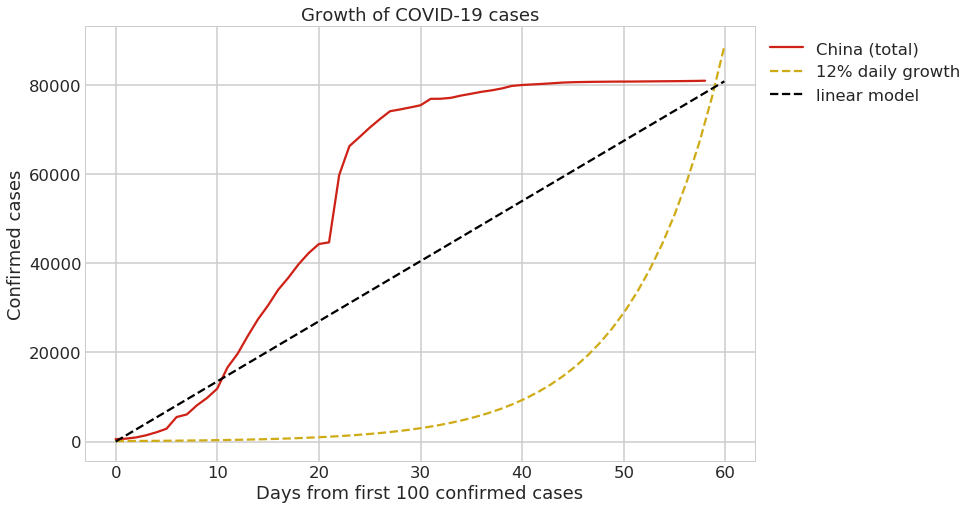

In [72]:
sns.set_palette(sns.hls_palette(8, l=.45, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip([["China (total)"]], line_styles):
    covid.plot_countries(df, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.12) ** x, ls='--', label='12% daily growth')
ax.plot(x, 1350*x, ls='--', color='k', label='linear model')

ax.set( title='Growth of COVID-19 cases',
        xlabel='Days from first 100 confirmed cases',
        ylabel='Confirmed cases' )
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
#ax.annotate(**annotate_kwargs)
#sns.despine();

## Successive situations

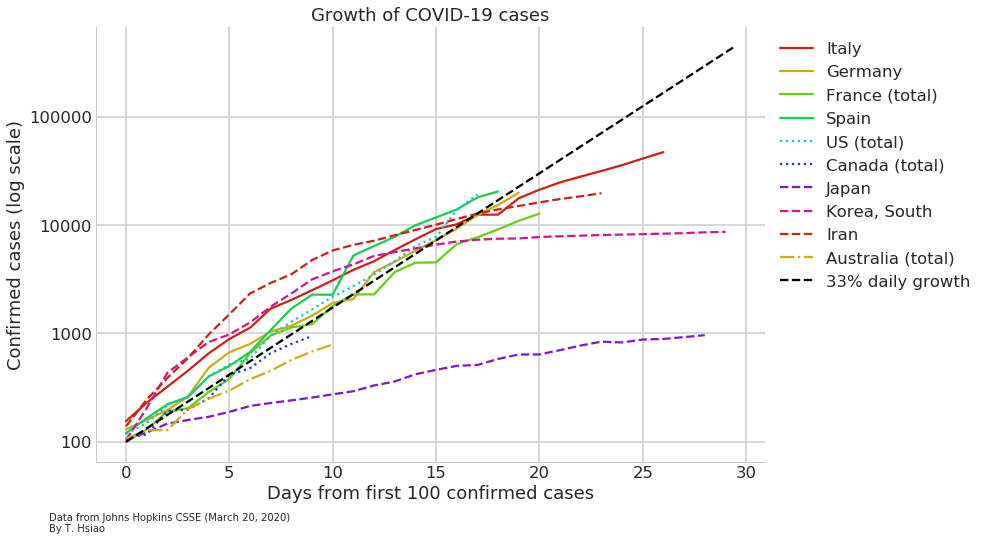

In [77]:
#sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip(country_groups, line_styles):
    covid.plot_countries(df, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')

ax.set( yscale='log',
        title='Growth of COVID-19 cases',
        xlabel='Days from first 100 confirmed cases',
        ylabel='Confirmed cases (log scale)' )
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.annotate(**annotate_kwargs)
sns.despine();

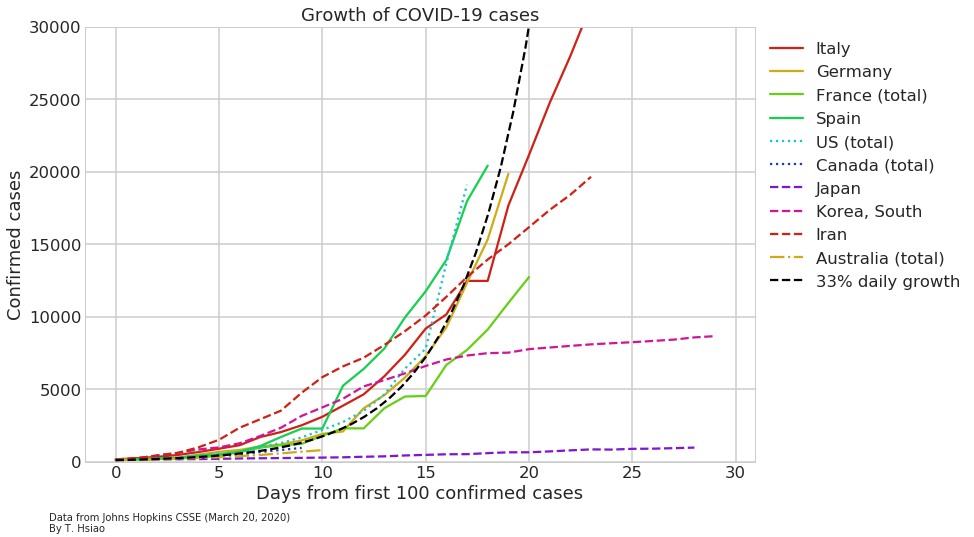

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip(country_groups, line_styles):
    plot_countries(df, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')

ax.set(title='Growth of COVID-19 cases',
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases', ylim=(0, 30000))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.annotate(**annotate_kwargs);
#sns.despine();

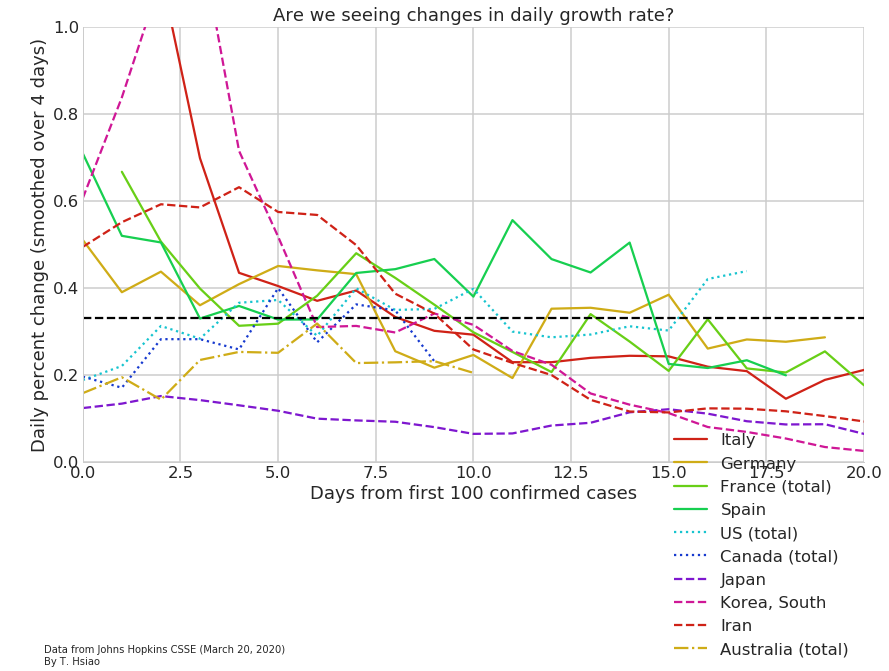

In [80]:
smooth_days = 4
fig, ax = plt.subplots(figsize=(14, 8))
df['pct_change'] = (df
                    .groupby('country')
                    .confirmed
                    .pct_change()
                    .rolling(smooth_days)
                    .mean()
)

for countries, ls in zip(country_groups, line_styles):
    (df.set_index('country')
       .loc[countries]
       .loc[lambda x: x.confirmed > 100]
       .reset_index()
       .set_index('days_since_100')
       .groupby('country', sort=False)['pct_change']
       .plot(ls=ls)
    )

ax.set(ylim=(0, 1),
       xlim=(0, 20),
       title='Are we seeing changes in daily growth rate?',
       xlabel='Days from first 100 confirmed cases',
       ylabel='Daily percent change (smoothed over {} days)'.format(smooth_days),
)
ax.axhline(.33, ls='--', color='k')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, .1))
sns.despine()
ax.annotate(**annotate_kwargs);

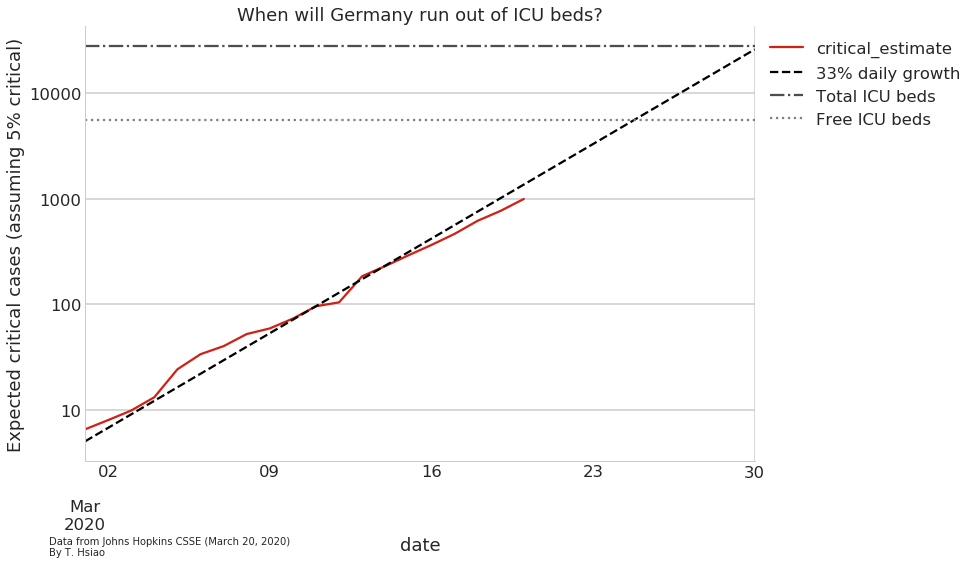

In [81]:
#collapse-hide
sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))
p_crit = .05
# 28000 ICU beds total, 80% occupied
icu_germany = 28000
icu_germany_free = .2

df_tmp = df.loc[lambda x: (x.country == 'Germany') & (x.confirmed > 100)].critical_estimate
df_tmp.plot(ax=ax)

x = np.linspace(0, 30, 30)
pd.Series(index=pd.date_range(df_tmp.index[0], periods=30),
          data=100*p_crit * (1.33) ** x).plot(ax=ax,ls='--', color='k', label='33% daily growth')

ax.axhline(icu_germany, color='.3', ls='-.', label='Total ICU beds')
ax.axhline(icu_germany * icu_germany_free, color='.5', ls=':', label='Free ICU beds')
ax.set(yscale='log',
       title='When will Germany run out of ICU beds?',
       ylabel='Expected critical cases (assuming {:.0f}% critical)'.format(100 * p_crit),
)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
sns.despine()
ax.annotate(**annotate_kwargs);